# Importing Libraries

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Defining Deterministic Functions

In [2]:
def g0(InputVector,CovarianceMatrix,MeanVector,ProbabilityOfClass0):
    a=np.log(np.linalg.det(CovarianceMatrix))
    a=float(a)/2
    b=np.matmul(np.subtract(InputVector ,MeanVector),np.linalg.inv(CovarianceMatrix))
    b=np.matmul(b,(np.subtract(InputVector ,MeanVector)).transpose())
    b=float(b)/2
    c=np.log(ProbabilityOfClass0)
    return c-b-a


def g1(InputVector,CovarianceMatrix,MeanVector,ProbabilityOfClass1):
    a=np.log(np.linalg.det(CovarianceMatrix))
    a=float(a)/2
    b=np.matmul(np.subtract(InputVector ,MeanVector),np.linalg.inv(CovarianceMatrix))
    b=np.matmul(b,(np.subtract(InputVector ,MeanVector)).transpose())
    b=float(b)/2
    c=np.log(ProbabilityOfClass1)
    return c-b-a

# Reading the data

In [3]:
# .csv files must be in same folder as this code if not then give the exact path name.
df1 = pd.read_csv("P2_train.csv",header=None)    #Reading training set
df2 = pd.read_csv("P2_test.csv",header=None)    #Reading test set

label_train=df1.iloc[:,2]
label_test=df2.iloc[:,2]
label_train=np.asarray(label_train)                     #Labels of training set
label_test=np.asarray(label_test)                       #Labels of test set

# Functions for Plotting Iso-Probability Curves

In [4]:
def f0(x,y,CovarianceMatrix,MeanVector,ProbabilityOfClass0):
    z=np.zeros((len(x),2))
    for i in range(0,len(x)):
        z[i][0]=x[i]
        z[i][1]=y[i]
    a = (-1/2)*np.sum(np.multiply(np.dot(z-MeanVector, np.linalg.inv(CovarianceMatrix)), (z-MeanVector)), axis = 1, keepdims = True)
    b = (-1/2)*np.log(np.linalg.det(CovarianceMatrix))
    c = np.log(ProbabilityOfClass0)
    return a+b+c

def f1(x,y,CovarianceMatrix,MeanVector,ProbabilityOfClass1):
    z=np.zeros((len(x),2))
    for i in range(0,len(x)):
        z[i][0]=x[i]
        z[i][1]=y[i]
    a = (-1/2)*np.sum(np.multiply(np.dot(z-MeanVector, np.linalg.inv(CovarianceMatrix)), (z-MeanVector)), axis = 1, keepdims = True)
    b = (-1/2)*np.log(np.linalg.det(CovarianceMatrix))
    c = np.log(ProbabilityOfClass1)
    return a+b+c


# Function for calculating missclassifications

In [5]:
def missclass(label_test,MeanClass0,CovarianceClass0,MeanClass1,CovarianceClass1,ProbailityOf0):
    correct0=0 #correctly classified to class 0
    correct1=0 #correctly classified to class 1
    wrong0=0   #misclassified to class 0
    wrong1=0   #misclassified to class 1
    label=0
    for i in range(0,len(label_test)):
        if g0(np.asarray(df2.iloc[i:i+1,0:2]),CovarianceClass0,MeanClass0,ProbailityOf0)>g1(np.asarray(df2.iloc[i:i+1,0:2]),CovarianceClass1,MeanClass1,(1- ProbailityOf0)):
            label=0
            if(label==label_test[i]):
                correct0+=1
            else:
                wrong0+=1
        else:
            label=1
            if(label==label_test[i]):
                correct1+=1
            else:
                wrong1+=1
    return correct0,correct1,wrong0,wrong1

# Calculating Mean Vectors

In [6]:
MeanClass0=[0]*2
MeanClass1=[0]*2 
total0=0                                                              #Total number of samples labeled as 0
total1=0                                                              #Total number of samples labeled as 1
for i in range(0,len(label_train)):
    if (label_train[i]==0):
        total0+=1
        MeanClass0=np.add(MeanClass0,np.asarray(df1.iloc[i:i+1,0:2]))
    else:
        total1+=1
        MeanClass1=np.add(MeanClass1,np.asarray(df1.iloc[i:i+1,0:2]))
MeanClass0=MeanClass0/float(total0)                                   #estimate of Mean Vector for Class 0
MeanClass1=MeanClass1/float(total1)                                   #estimate of Mean Vector for Class 1

# Calculating Covariance Matrix

In [7]:
S_0 = [0]*2
S_1 = [0]*2
count0=0
count1=0
train_data_class0 = np.zeros((total0, 2))
train_data_class1 = np.zeros((total1, 2))
CovarianceClass0 = np.zeros((2,2))
CovarianceClass1 = np.zeros((2,2))
for i in range(0,len(label_train)):
    if (label_train[i]==0):
        train_data_class0[count0]=df1.iloc[i:i+1,0:2]
        S_0 = np.subtract(np.asarray(df1.iloc[i:i+1,0:2]),MeanClass0)
        CovarianceClass0 = np.add(CovarianceClass0,np.matmul(S_0.transpose(),S_0))
        count0+=1
    else:
        train_data_class1[count1]=df1.iloc[i:i+1,0:2]
        S_1 = np.subtract(np.asarray(df1.iloc[i:i+1,0:2]),MeanClass1)
        CovarianceClass1 = np.add(CovarianceClass1,np.matmul(S_1.transpose(),S_1))
        count1+=1
CovarianceClass0 = CovarianceClass0/float(total0) #estimate of covariance matrix for class 0
CovarianceClass1 = CovarianceClass1/float(total1) #estimate of covariance matrix for class 1

# Calculating probability of Class 0

In [8]:
p=float(total0)/len(label_train)                                      #Estimate of aprior probability of Class 0
print "Estimated aprior probability of Class 0 :",p
print "Estimated aprior probability of Class 1 :",1-p

Estimated aprior probability of Class 0 : 0.483870967742
Estimated aprior probability of Class 1 : 0.516129032258


# CASE 1: Original Covariance matrices

### Misclassification for CASE 1

In [9]:
print "CASE 1: Original Covariance matrices"
correct0,correct1,wrong0,wrong1=missclass(label_test,MeanClass0,CovarianceClass0,MeanClass1,CovarianceClass1,p)
print "------------------------------------"
print "Number of data points with label 0 and classified as label 0 :",correct0
print "Number of data points with label 0 and classified as label 1 :",wrong1
print "Number of data points with label 1 and classified as label 1 :",correct1
print "Number of data points with label 1 and classified as label 0 :",wrong0
print "------------------------------------"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('The misclassification rate for class 1 is %f '%(missclassification1) + '%')

CASE 1: Original Covariance matrices
------------------------------------
Number of data points with label 0 and classified as label 0 : 50
Number of data points with label 0 and classified as label 1 : 0
Number of data points with label 1 and classified as label 1 : 40
Number of data points with label 1 and classified as label 0 : 0
------------------------------------
The misclassification rate for class 0 is 0.000000 %
The misclassification rate for class 1 is 0.000000 %


### Confusion Matrix for CASE 1

In [10]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [ wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix for CASE 1 is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix for CASE 1 is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             50              0
 Actual Label 1              0             40


### Plotting discriminant function and iso-probability contours for CASE 1


-------------------------------------------------------------
Discriminant Function and Iso-Probability Contours for CASE 1
-------------------------------------------------------------


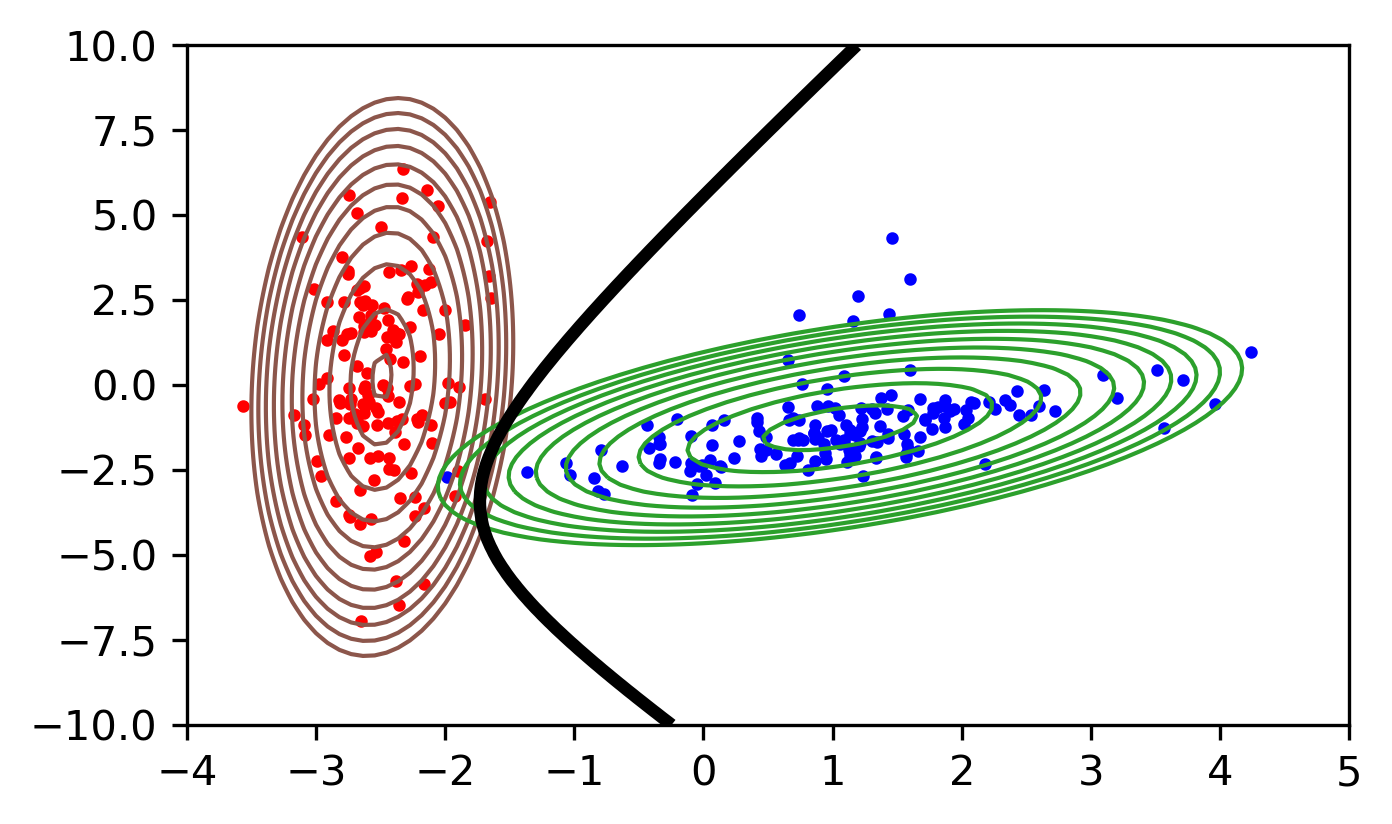

In [11]:
X, Y = np.mgrid[-4:5:100j, -10:10:100j]
x = X.ravel()
y = Y.ravel()
t = f0(x,y,CovarianceClass0,MeanClass0,p)
t = t.reshape(X.shape)
r = f1(x,y,CovarianceClass1,MeanClass1,1-p)
r = r.reshape(X.shape)
s = (f0(x,y,CovarianceClass0,MeanClass0,p)-f1(x,y,CovarianceClass1,MeanClass1,1-p)).reshape(X.shape)
print "-------------------------------------------------------------"
print "Discriminant Function and Iso-Probability Contours for CASE 1"
print "-------------------------------------------------------------"
plt.figure(figsize=(5,3),dpi=300)
plt.contour(X, Y, t, levels = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,-0.5],colors = 'tab:brown', linewidths= [1],linestyles='solid')
plt.contour(X, Y, r, levels = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,-0.5],colors = 'tab:green', linewidths= [1],linestyles='solid')
plt.contour(X, Y, s, levels=[0], colors = 'black', linewidths= [3])
plt.scatter(train_data_class0[:, 0], train_data_class0[:, 1], color = 'red', s = 4 )
plt.scatter(train_data_class1[:, 0], train_data_class1[:, 1], color = 'blue', s = 4)
plt.show()

# CASE 2: Shared covariance matrix

### Calculating shared covariance matrix


In [12]:
#Taking weighted mean of Cavariance Matrices
TotalVariance=p*CovarianceClass0+(1-p)*CovarianceClass1

### Misclassification for CASE 2

In [13]:
print "CASE 2: Shared Covariance matrix"
correct0,correct1,wrong0,wrong1=missclass(label_test,MeanClass0,TotalVariance,MeanClass1,TotalVariance,p)
print "------------------------------------"
print "Number of data points with label 0 and classified as label 0 :",correct0
print "Number of data points with label 0 and classified as label 1 :",wrong1
print "Number of data points with label 1 and classified as label 1 :",correct1
print "Number of data points with label 1 and classified as label 0 :",wrong0
print "------------------------------------"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('The misclassification rate for class 1 is %f '%(missclassification1) + '%')

CASE 2: Shared Covariance matrix
------------------------------------
Number of data points with label 0 and classified as label 0 : 50
Number of data points with label 0 and classified as label 1 : 0
Number of data points with label 1 and classified as label 1 : 39
Number of data points with label 1 and classified as label 0 : 1
------------------------------------
The misclassification rate for class 0 is 0.000000 %
The misclassification rate for class 1 is 2.500000 %


### Confusion Matrix for CASE 2

In [14]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [ wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix for CASE 2 is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix for CASE 2 is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             50              0
 Actual Label 1              1             39


### Plotting discriminant function and iso-probability contours for CASE 2

-------------------------------------------------------------
Discriminant Function and Iso-Probability Contours for CASE 2
-------------------------------------------------------------


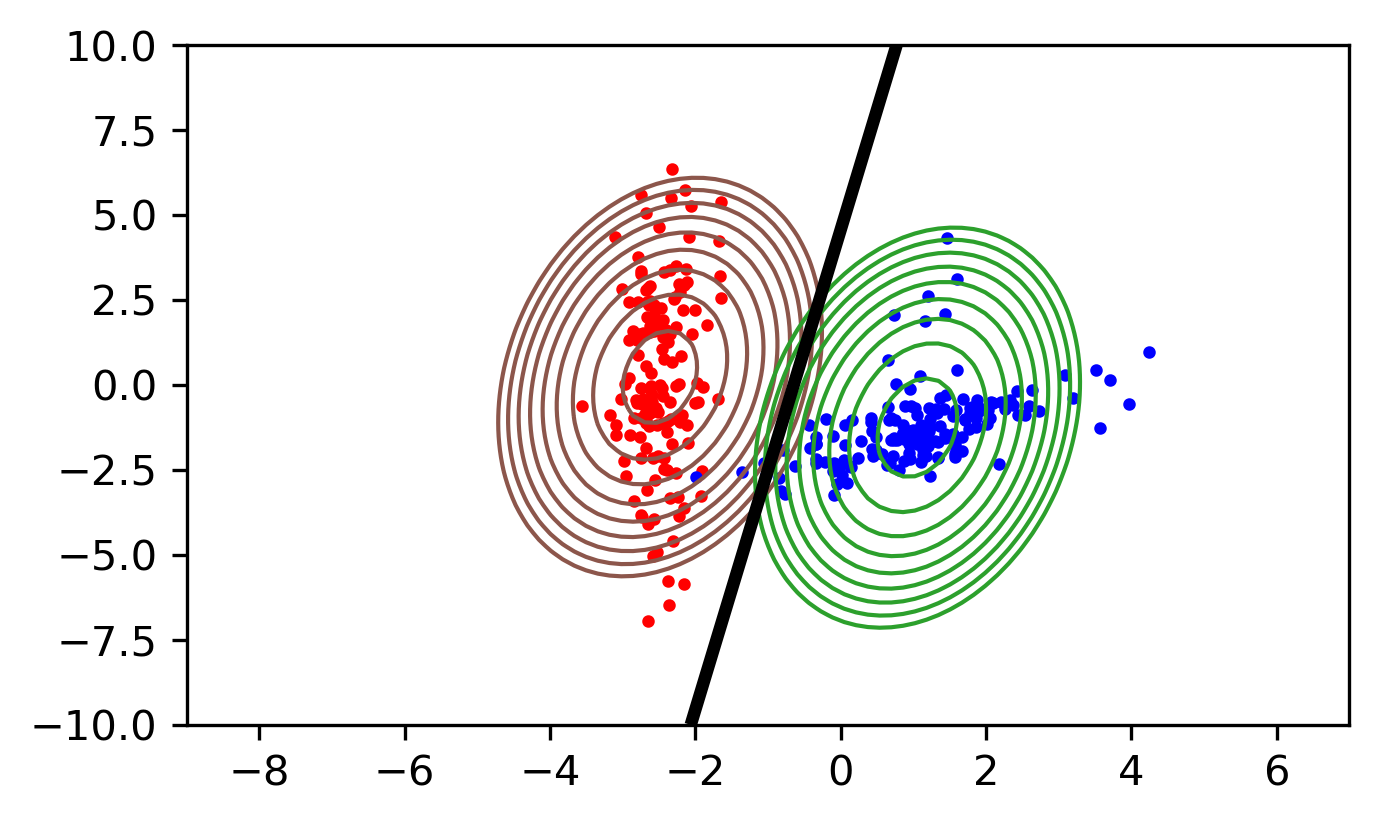

In [15]:
X, Y = np.mgrid[-9:7:100j, -10:10:100j]
x = X.ravel()
y = Y.ravel()
t = f0(x,y,TotalVariance,MeanClass0,p)
t = t.reshape(X.shape)
r = f1(x,y,TotalVariance,MeanClass1,1-p)
r = r.reshape(X.shape)
s = (f0(x,y,TotalVariance,MeanClass0,p)-f1(x,y,TotalVariance,MeanClass1,1-p)).reshape(X.shape)
print "-------------------------------------------------------------"
print "Discriminant Function and Iso-Probability Contours for CASE 2"
print "-------------------------------------------------------------"
plt.figure(figsize=(5,3),dpi=300)
plt.contour(X, Y, t, levels = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,-0.5],colors = 'tab:brown', linewidths= [1],linestyles='solid')
plt.contour(X, Y, r, levels = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,-0.5],colors = 'tab:green', linewidths= [1],linestyles='solid')
plt.contour(X, Y, s, levels=[0], colors = 'black', linewidths= [3])
plt.scatter(train_data_class0[:, 0], train_data_class0[:, 1], color = 'red', s = 4 )
plt.scatter(train_data_class1[:, 0], train_data_class1[:, 1], color = 'blue', s = 4)
plt.show()

# CASE 3: Shared covariance matrix (with zero off diagonal entries and unequal diagonal entries)

### Calculating mean of individual attribute for each class assuming independent

Further simplication may be possible by assuming all off-diagonals of the covariance matrix to be 0, thus assuming attributes as independent variables.

In [16]:
mean1_0=0                 #Mean of first attribute that belongs to class 0
mean1_1=0                 #Mean of first attribute that belongs to class 1
mean2_0=0                 #Mean of second attribute that belongs to class 0
mean2_1=0                 #Mean of second attribute that belongs to class 1
for i in range(0,len(label_train)):
    if label_train[i]==0:
        mean1_0+=np.asarray(df1.iloc[i:i+1,0:1])
        mean2_0+=np.asarray(df1.iloc[i:i+1,1:2])
    else:
        mean1_1+=np.asarray(df1.iloc[i:i+1,0:1])
        mean2_1+=np.asarray(df1.iloc[i:i+1,1:2])
mean1_0=mean1_0/float(total0)
mean2_0=mean1_0/float(total0)
mean1_1=mean1_1/float(total1)
mean2_1=mean2_1/float(total1)

### Calculating variance of individual attribute for each class assuming independent

In [17]:
variance1_0=0         #Variance of first attribute that belongs to class 0
variance2_0=0         #Variance of second attribute that belongs to class 0
variance1_1=0         #Variance of first attribute that belongs to class 1
variance2_1=0         #Variance of second attribute that belongs to class 1
for i in range(0,len(label_train)):
    if label_train[i]==0:
        variance1_0+=((np.asarray(df1.iloc[i:i+1,0:1])-mean1_0)*(np.asarray(df1.iloc[i:i+1,0:1])-mean1_0))
        variance2_0+=((np.asarray(df1.iloc[i:i+1,1:2])-mean2_0)*(np.asarray(df1.iloc[i:i+1,1:2])-mean2_0))
    else:
        variance1_1+=((np.asarray(df1.iloc[i:i+1,0:1])-mean1_1)*(np.asarray(df1.iloc[i:i+1,0:1])-mean1_1))
        variance2_1+=((np.asarray(df1.iloc[i:i+1,1:2])-mean2_1)*(np.asarray(df1.iloc[i:i+1,1:2])-mean2_1))
variance1_0=variance1_0/float(total0)
variance2_0=variance2_0/float(total0)
variance1_1=variance1_1/float(total1)
variance2_1=variance2_1/float(total1)

### Making off diagonal entries of covariance matrix equal to zero

In [18]:
TotalVariance[0][0]=((p*variance1_0)+((1-p)*variance1_1))
TotalVariance[0][1]=0
TotalVariance[1][0]=0
TotalVariance[1][1]=((p*variance2_0)+((1-p)*variance2_1))

### Misclassification for CASE 3

In [19]:
print "CASE 3: Shared covariance matrix (Diagonal, unequal)"
correct0,correct1,wrong0,wrong1=missclass(label_test,MeanClass0,TotalVariance,MeanClass1,TotalVariance,p)
print "------------------------------------"
print "Number of data points with label 0 and classified as label 0 :",correct0
print "Number of data points with label 0 and classified as label 1 :",wrong1
print "Number of data points with label 1 and classified as label 1 :",correct1
print "Number of data points with label 1 and classified as label 0 :",wrong0
print "------------------------------------"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('The misclassification rate for class 1 is %f '%(missclassification1) + '%')

CASE 3: Shared covariance matrix (Diagonal, unequal)
------------------------------------
Number of data points with label 0 and classified as label 0 : 50
Number of data points with label 0 and classified as label 1 : 0
Number of data points with label 1 and classified as label 1 : 39
Number of data points with label 1 and classified as label 0 : 1
------------------------------------
The misclassification rate for class 0 is 0.000000 %
The misclassification rate for class 1 is 2.500000 %


### Confusion Matrix for CASE 3

In [20]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [ wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix for CASE 3 is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix for CASE 3 is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             50              0
 Actual Label 1              1             39


### Plotting discriminant function and iso-probability contours for CASE 3

-------------------------------------------------------------
Discriminant Function and Iso-Probability Contours for CASE 3
-------------------------------------------------------------


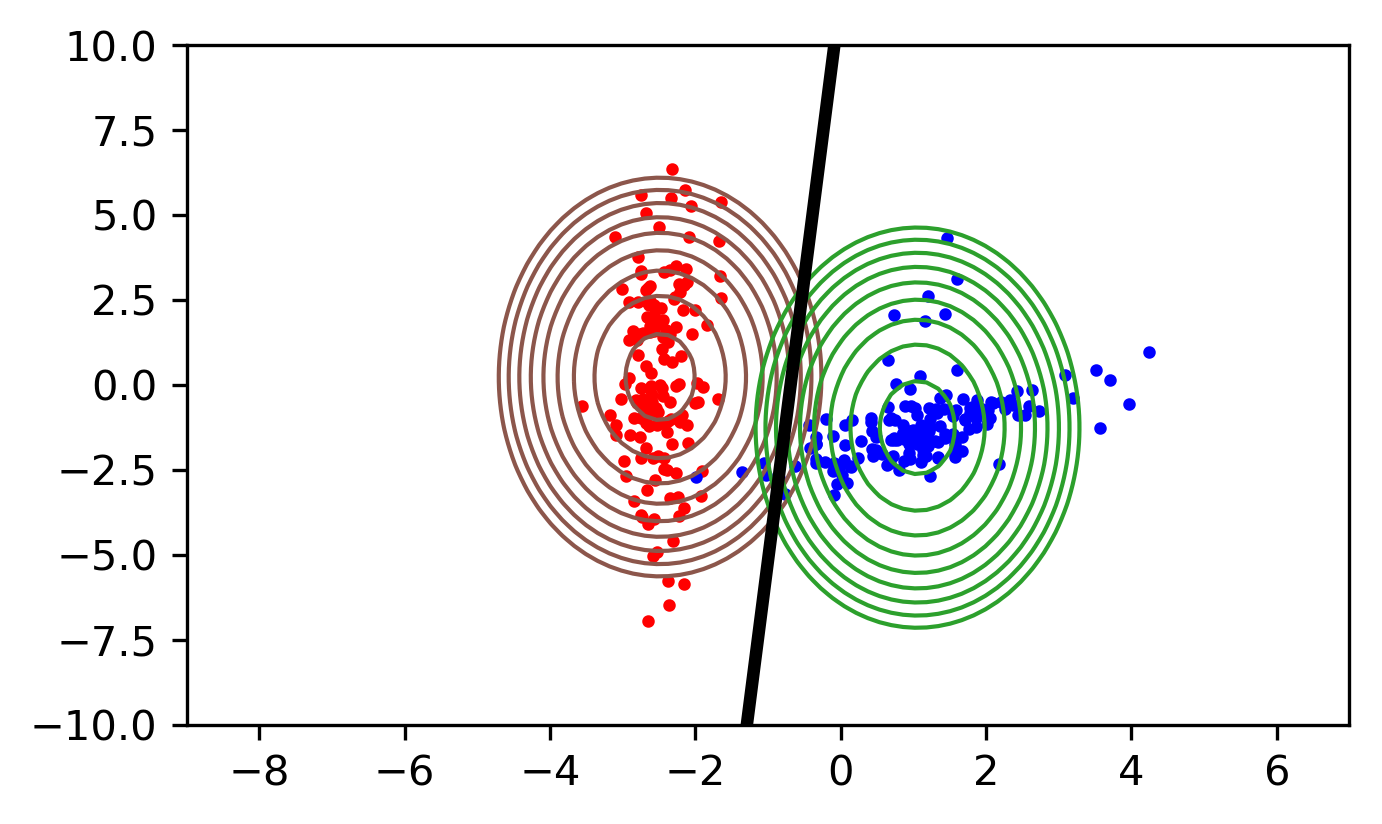

In [21]:
X, Y = np.mgrid[-9:7:100j, -10:10:100j]
x = X.ravel()
y = Y.ravel()
t = f0(x,y,TotalVariance,MeanClass0,p)
t = t.reshape(X.shape)
r = f1(x,y,TotalVariance,MeanClass1,1-p)
r = r.reshape(X.shape)
s = (f0(x,y,TotalVariance,MeanClass0,p)-f1(x,y,TotalVariance,MeanClass1,1-p)).reshape(X.shape)

print "-------------------------------------------------------------"
print "Discriminant Function and Iso-Probability Contours for CASE 3"
print "-------------------------------------------------------------"
plt.figure(figsize=(5,3),dpi=300)
plt.contour(X, Y, t, levels = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,-0.5],colors = 'tab:brown', linewidths= [1],linestyles='solid')
plt.contour(X, Y, r, levels = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,-0.5],colors = 'tab:green', linewidths= [1],linestyles='solid')
plt.contour(X, Y, s, levels=[0], colors = 'black', linewidths= [3])
plt.scatter(train_data_class0[:, 0], train_data_class0[:, 1], color = 'red', s = 4 )
plt.scatter(train_data_class1[:, 0], train_data_class1[:, 1], color = 'blue', s = 4)
plt.show()

# CASE 4: Shared covariance matrix (with zero off diagonal entries and equal diagonal entries)

### Making diagonal entries equal by taking the average

Taking arithmetic mean of the diagonal entries in the above calculated covariance matrix

In [22]:
TotalVariance[0][0]= ((0.5*TotalVariance[0][0])+((0.5)*TotalVariance[1][1]))
TotalVariance[1][1]=TotalVariance[0][0]

### Misclassification for CASE 4

In [23]:
print "CASE 4: shared Covariance matrix (Diagonal, equal)"
correct0,correct1,wrong0,wrong1=missclass(label_test,MeanClass0,TotalVariance,MeanClass1,TotalVariance,p)
print "------------------------------------"
print "Number of data points with label 0 and classified as label 0 :",correct0
print "Number of data points with label 0 and classified as label 1 :",wrong1
print "Number of data points with label 1 and classified as label 1 :",correct1
print "Number of data points with label 1 and classified as label 0 :",wrong0
print "------------------------------------"
missclassification0=(float(wrong1)/(wrong1+correct0))*100
missclassification1=(float(wrong0)/(wrong0+correct1))*100
print('The misclassification rate for class 0 is %f '%(missclassification0) + '%')
print('The misclassification rate for class 1 is %f '%(missclassification1) + '%')

CASE 4: shared Covariance matrix (Diagonal, equal)
------------------------------------
Number of data points with label 0 and classified as label 0 : 47
Number of data points with label 0 and classified as label 1 : 3
Number of data points with label 1 and classified as label 1 : 40
Number of data points with label 1 and classified as label 0 : 0
------------------------------------
The misclassification rate for class 0 is 6.000000 %
The misclassification rate for class 1 is 0.000000 %


### Confusion Matrix for CASE 4

In [24]:
ConfusionMatrix = np.matrix([[correct0,wrong1], [ wrong0,correct1]])

# Printing the Confusion Matrix

print('The Confusion Matrix for CASE 4 is as follows :\n')
ConfusionMatrix= np.array(ConfusionMatrix)
UpperTitle = ["  Predicted Label 0", "  Predicted Label 1"]
LeftTitle = ["Actual Label 0", "Actual Label 1"]
row_format ="{:>15}" * (len(UpperTitle) + 1)
print row_format.format("", *UpperTitle)
for x, row in zip(LeftTitle, ConfusionMatrix):
    print row_format.format(x, *row)

The Confusion Matrix for CASE 4 is as follows :

                 Predicted Label 0  Predicted Label 1
 Actual Label 0             47              3
 Actual Label 1              0             40


### Plotting discriminant function and iso-probability contours for CASE 4

-------------------------------------------------------------
Discriminant Function and Iso-Probability Contours for CASE 4
-------------------------------------------------------------


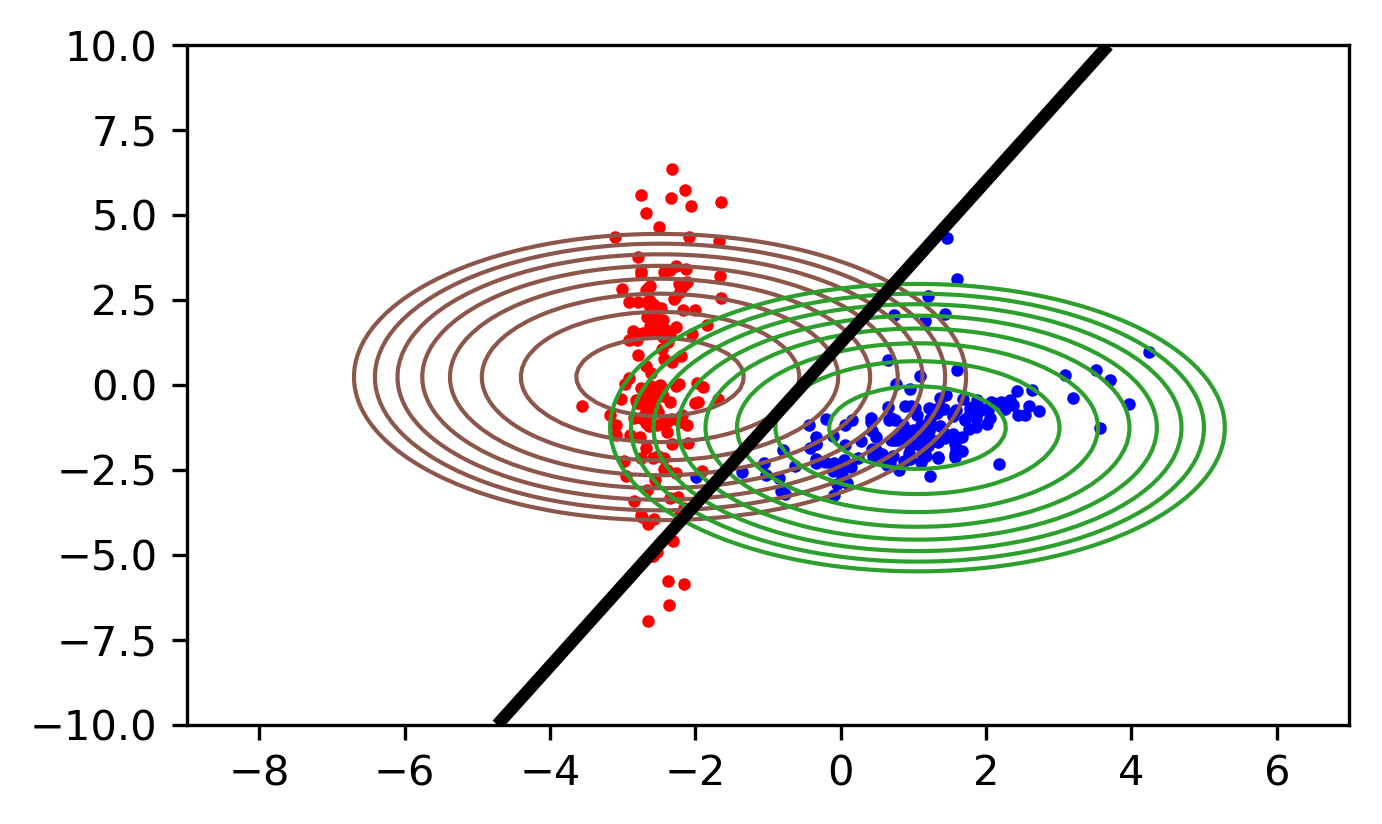

In [25]:
X, Y = np.mgrid[-9:7:100j, -10:10:100j]
x = X.ravel()
y = Y.ravel()
t = f0(x,y,TotalVariance,MeanClass0,p)
t = t.reshape(X.shape)
r = f1(x,y,TotalVariance,MeanClass1,1-p)
r = r.reshape(X.shape)
s = (f0(x,y,TotalVariance,MeanClass0,p)-f1(x,y,TotalVariance,MeanClass1,1-p)).reshape(X.shape)
print "-------------------------------------------------------------"
print "Discriminant Function and Iso-Probability Contours for CASE 4"
print "-------------------------------------------------------------"
plt.figure(figsize=(5,3),dpi=300)
plt.contour(X, Y, t, levels = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,-0.5],colors = 'tab:brown', linewidths= [1],linestyles='solid')
plt.contour(X, Y, r, levels = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,-0.5],colors = 'tab:green', linewidths= [1],linestyles='solid')
plt.contour(X, Y, s, levels=[0], colors = 'black', linewidths= [3])
plt.scatter(train_data_class0[:, 0], train_data_class0[:, 1], color = 'red', s = 4 )
plt.scatter(train_data_class1[:, 0], train_data_class1[:, 1], color = 'blue', s = 4)
plt.show()